# 1. 보스턴 집값 예측

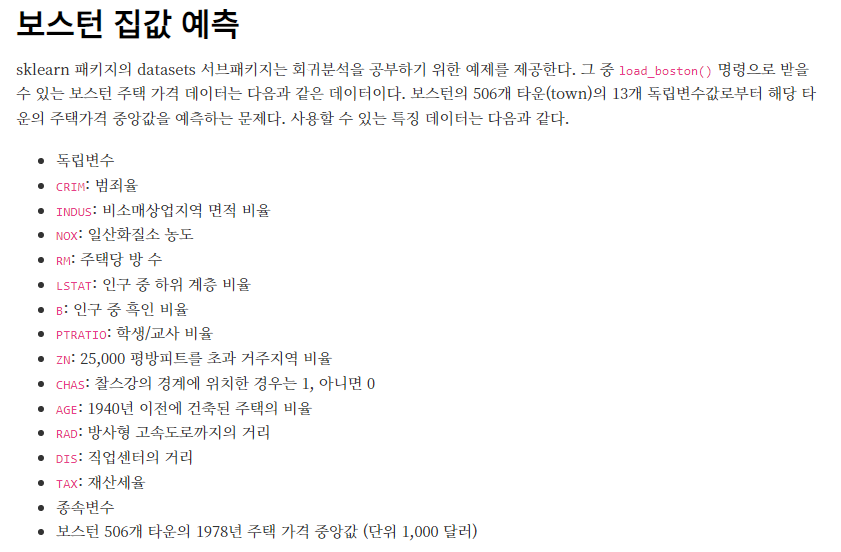

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [5]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

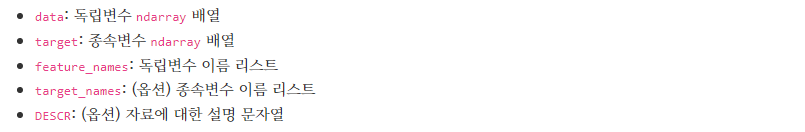

In [9]:
dfX = pd.DataFrame(boston['data'], columns=boston['feature_names'])
dfX.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [14]:
dfy = pd.DataFrame(boston['target'], columns=['MEDV'])
dfy.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


In [15]:
df = pd.concat([dfX, dfy], axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


#### 일부 독립변수와 종속 변수 관계 살펴보기

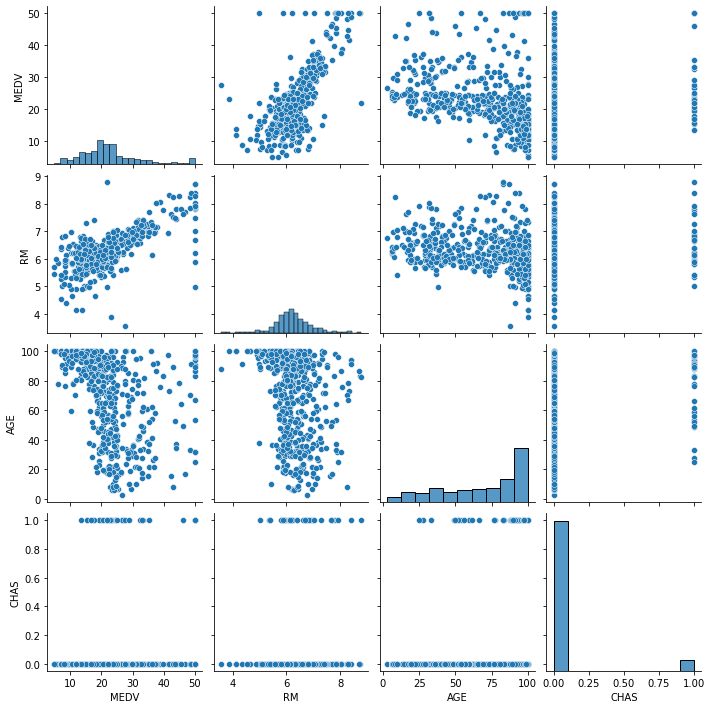

In [20]:
sns.pairplot(df[['MEDV','RM','AGE','CHAS']])
plt.show()

#### 종속변수인 `집값(MEDV)`과 `#방개수(RM)`, `노후화정도(AGE)`와의 관계 파악 가능
- 방 개수가 증가할 수록 집값은 증가하는 경향이 보인다.
- 노후와 정도와 집값은 관계가 없어 보인다.
- 찰스강 유역 여부(CHAS)는 범주값으로, 0일때 보다 1일때 집값이 평균이 높아지는 걸 볼 수 있다.

# 2. 당뇨병 진행도 예측

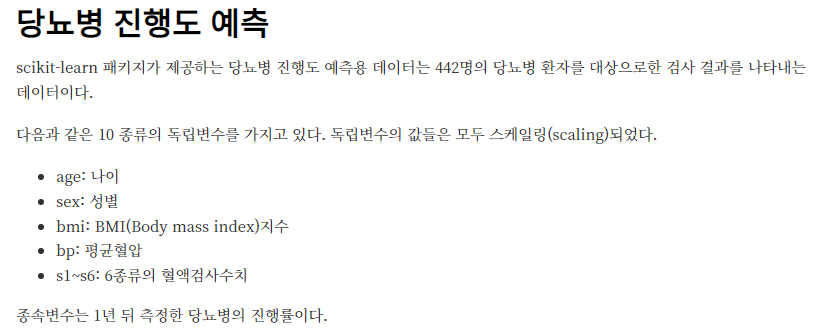

In [22]:
from sklearn.datasets import load_diabetes

In [23]:
diabetes = load_diabetes()

In [24]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [26]:
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [27]:
df['target'] = diabetes['target']
df.tail(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


#### 독립변수와 종속변수간의 관계 알아보기

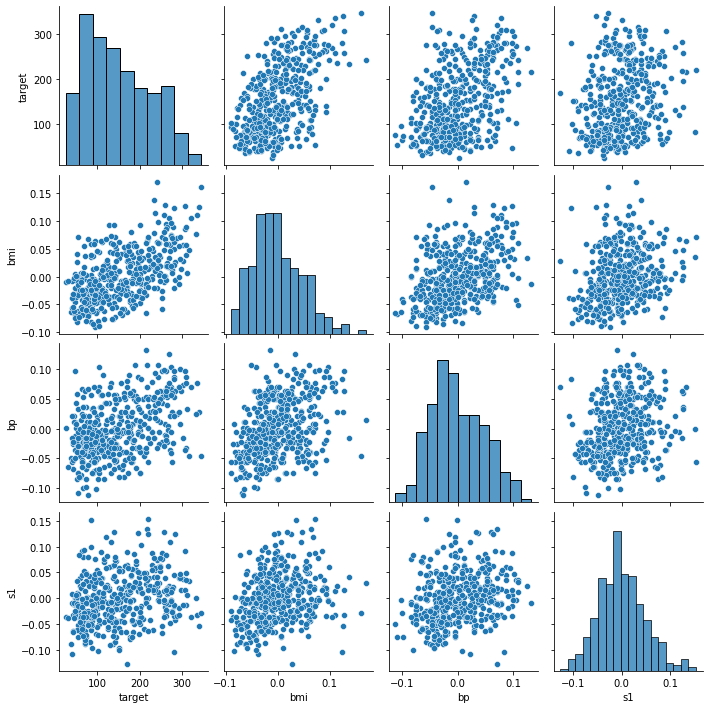

In [28]:
sns.pairplot(df[['target','bmi','bp', 's1']])
plt.show()

- 독립변수인 `BMI 지수(bmi)`와 `평균혈압(bp)`가 종속변수인 당뇨병 진행도와 `양의 상관관계`를 가짐을 보인다.
- 또한, 두 독립변수 `BMI지수(bmi)`와 `평균혈압(bp)` 또한 서로 `양의 상관관계`|를 가진다.
- 독립변수들끼리 상관관계를 가지는 `다중공선성(multicolinearity)`를 가지고 있음
- `다중공선성`은 회귀분석 결과에 영향을 미칠 수 있음

# 3. 가상 데이터 예측
- scikit-learn 패키지가 제공하는 가상의 회귀분석 문제를 만들어주는 make_regression() 명령

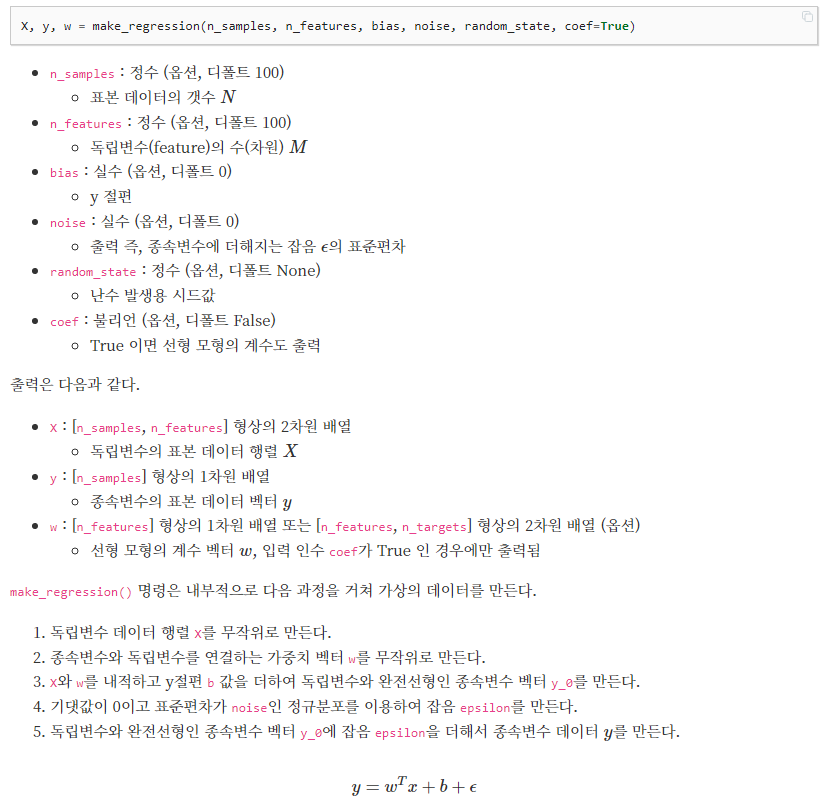

In [64]:
from sklearn.datasets import make_regression

X,y,w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0)

In [65]:
X[:10]

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ]])

In [34]:
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100

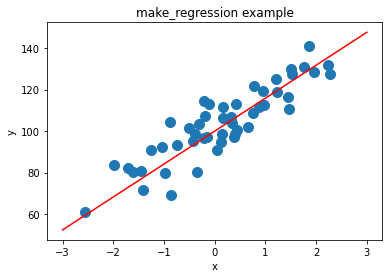

In [35]:
plt.plot(xx, y0, 'r')
plt.scatter(X, y, s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('make_regression example')
plt.show()

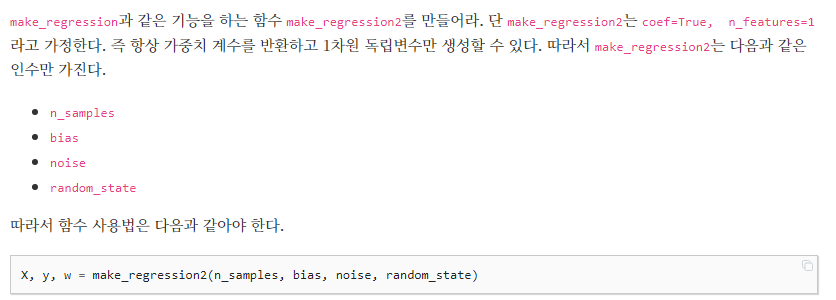

#### 독립변수가 2개인 표본 데이터를 생성하여, scatter plot을 그리기
- 점의 밝기가 밝으면 종속변숫값이 큰 것이고, 점의 밝기가 어두우면 종속변숫값이 작은 것

In [66]:
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [67]:
make_regression3 = make_regression
X, y, w = make_regression3(n_samples=300, n_features=2, noise=10, coef=True, random_state=0)

In [69]:
X[:10]

array([[ 0.4393917 , -1.49125759],
       [-0.07392467,  2.69622405],
       [ 0.38728048, -1.69810582],
       [-1.41690611, -0.46684555],
       [ 0.1887786 , -1.93627981],
       [-1.11589699, -0.59865394],
       [ 0.69474914,  0.69153875],
       [-0.28688719, -0.04217145],
       [-1.07993151,  1.12663592],
       [-0.23346666, -0.30911444]])

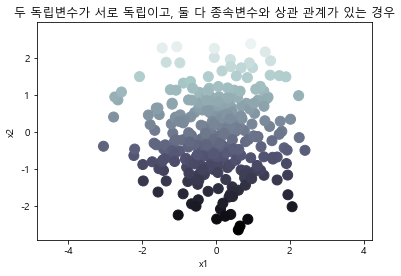

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('두 독립변수가 서로 독립이고, 둘 다 종속변수와 상관 관계가 있는 경우')
plt.show()

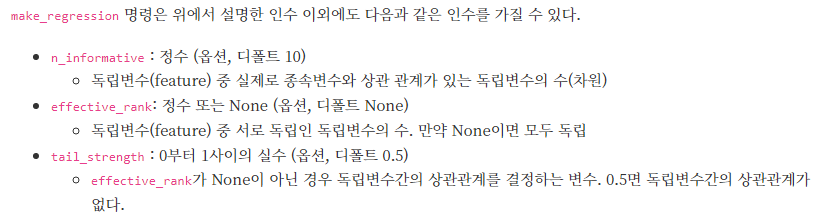

- 두 독립변수 중 실제로 종속변수에 영향을 미치는 독립변수가 하나 뿐이라면 `n_informative=1`로 설정함 

In [71]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0)

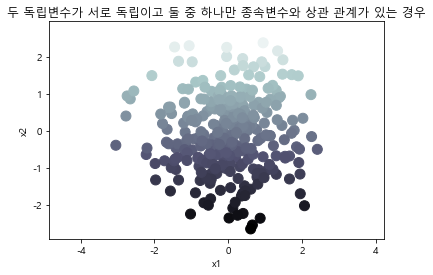

In [73]:
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우')
plt.show()

- 두 독립변수가 서로 독립이 아니고 상관관계를 가지는 다중공선성 데이터를 만드는 경우 tail_strength 인수를 0에 가까운 작은 값으로 설정

In [75]:
X, y, w =make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0, 
                        tail_strength=0)

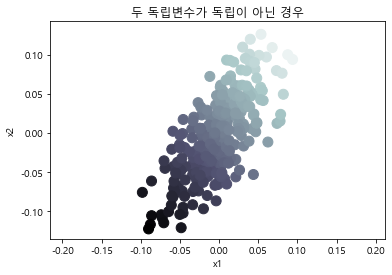

In [77]:
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('두 독립변수가 독립이 아닌 경우')
plt.show()